#### 1) Generate 10000 samples of a uniform random variable. Use the inverse CDF method to generate a. Exponential random variable with mean 0.2. b. Rayleigh random variable with mean 1.

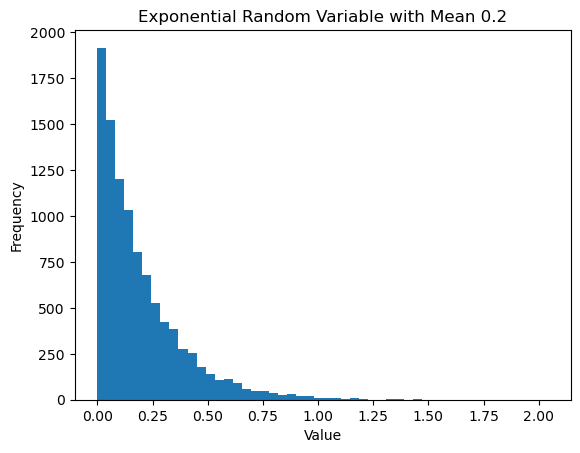

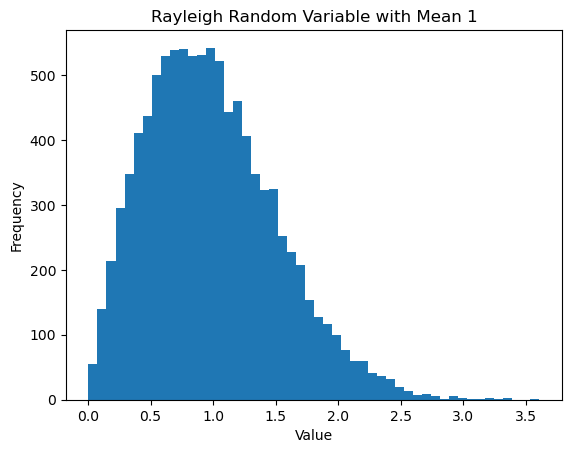

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 10000 samples of a uniform random variable
samples = np.random.uniform(size=10000)

# Part (a): Exponential random variable with mean 0.2
# Define the inverse CDF function for the exponential distribution
def inv_exp_cdf(y, lambd):
    return -np.log(1 - y) / lambd

# Set the mean of the exponential distribution
mean = 0.2
lambd = 1 / mean

# Apply the inverse CDF function to the uniform samples
exponential_samples = inv_exp_cdf(samples, lambd)

# Plot a histogram of the exponential samples
plt.hist(exponential_samples, bins=50)
plt.title('Exponential Random Variable with Mean 0.2')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Part (b): Rayleigh random variable with mean 1
# Define the inverse CDF function for the Rayleigh distribution
def inv_rayleigh_cdf(y, sigma):
    return sigma * np.sqrt(-2 * np.log(1 - y))

# Set the mean of the Rayleigh distribution
mean = 1
sigma = mean / np.sqrt(np.pi / 2)

# Apply the inverse CDF function to the uniform samples
rayleigh_samples = inv_rayleigh_cdf(samples, sigma)

# Plot a histogram of the Rayleigh samples
plt.hist(rayleigh_samples, bins=50)
plt.title('Rayleigh Random Variable with Mean 1')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


#### 2) Generate 10000 samples of a standard normal distribution using a. Central limit theorem b. Box-Muller method

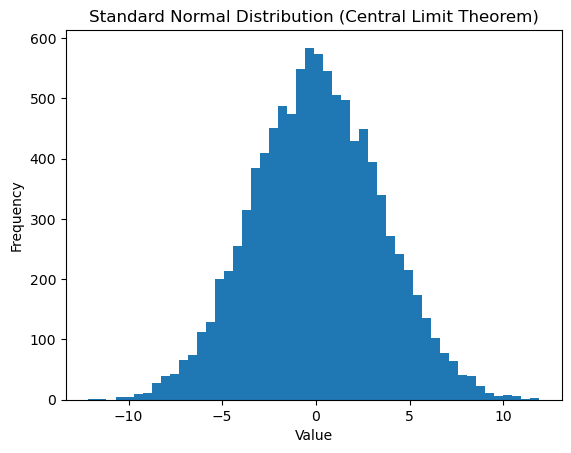

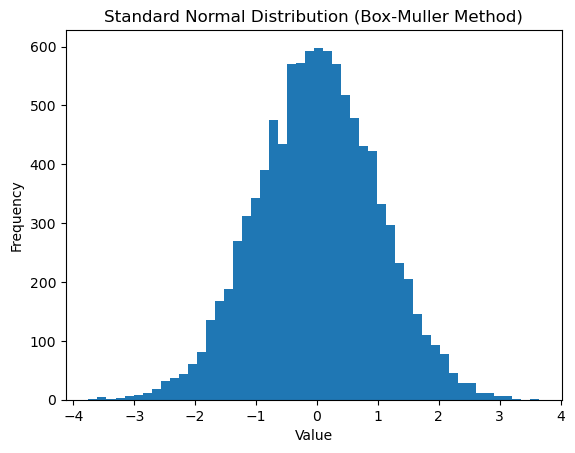

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Part (a): Central limit theorem
# Generate 10000 samples of a standard uniform random variable
u = np.random.uniform(size=(10000, 12))

# Apply the central limit theorem to obtain standard normal samples
normal_samples_clt = np.sum(u - 0.5, axis=1) / np.sqrt(1/12)

# Plot a histogram of the standard normal samples
plt.hist(normal_samples_clt, bins=50)
plt.title('Standard Normal Distribution (Central Limit Theorem)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Part (b): Box-Muller method
# Generate 10000 pairs of uniform random variables
u1 = np.random.uniform(size=10000)
u2 = np.random.uniform(size=10000)

# Apply the Box-Muller method to obtain standard normal samples
normal_samples_bm = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)

# Plot a histogram of the standard normal samples
plt.hist(normal_samples_bm, bins=50)
plt.title('Standard Normal Distribution (Box-Muller Method)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


#### 3) Write code to obtain the answer to the following question: The Amazing Spider-Man: Green Goblin, an arch nemesis of Spider-Man is located at a corner of a cubical shaped building (say (0,0,0)) and is distracted from the world. Spider-Man wants to catch him but is located at the opposite corner (say (1,1,1)). To conceal himself, Spider-Man decides to only move along the edges of the cubical shaped building in any direction (x,y,z) with equal probability 1/3. On an average, how many steps will Spider-Man need to get to Green Goblin?

In [22]:
import numpy as np

def spiderman_walk(max_steps):
    
    pos_spiderman = np.array([1, 1, 1])  # Start position of Spider-Man
    pos_goblin = np.array([0, 0, 0])  # Position of Green Goblin

    steps = 0
    while not np.all(pos_spiderman == pos_goblin):
        # Choose a random direction
        direction = np.random.choice(['x', 'y', 'z'])

        # Move Spider-Man in the chosen direction by one unit
        if direction == 'x':
            pos_spiderman[0] += np.random.choice([-1, 1])
        elif direction == 'y':
            pos_spiderman[1] += np.random.choice([-1, 1])
        elif direction == 'z':
            pos_spiderman[2] += np.random.choice([-1, 1])

        steps += 1

        # Check if Spider-Man has taken too many steps
        if steps >= max_steps:
            return -1

    return steps


# Perform Monte Carlo simulation to estimate the average number of steps
num_simulations = 200
max_steps = 50
total_steps = 0
num_success = 0  # Number of successful simulations
for i in range(num_simulations):
    result = spiderman_walk(max_steps)
    if result != -1:
        total_steps += result
        num_success += 1

avg_steps = total_steps / num_success

print(f"On an average, Spider-Man needs {avg_steps:.2f} steps to get to Green Goblin.")


On an average, Spider-Man needs 10.20 steps to get to Green Goblin.


#### 4) Write code to simulate the following Markov chain and determine it limiting distribution.

In [2]:
import numpy as np

# Define the transition matrix
P = np.array([[0.25, 0.5, 0.25],
              [0.33, 0, 0.67],
              [0.5, 0, 0.5]])

# Define the initial state distribution
pi_0 = np.array([1, 0, 0]) # start at state 1

# Simulate the Markov chain
n_simulations = 100
state = np.zeros(n_simulations)
state[0] = np.random.choice([0, 1, 2], p=pi_0)
print("Simulation:")
print(f"Step 0: {state[0]+1}")
for i in range(1, n_simulations):
    state[i] = np.random.choice([0, 1, 2], p=P[int(state[i-1])])
    print(f"Step {i}: {state[i]+1}")

# Calculate the limiting distribution
pi = np.zeros(3)
for i in range(n_simulations):
    pi[int(state[i])] += 1
pi = pi / n_simulations

# Print the limiting distribution
print("Limiting distribution: ", pi)


Simulation:
Step 0: 1.0
Step 1: 2.0
Step 2: 3.0
Step 3: 3.0
Step 4: 1.0
Step 5: 2.0
Step 6: 3.0
Step 7: 1.0
Step 8: 1.0
Step 9: 3.0
Step 10: 3.0
Step 11: 3.0
Step 12: 1.0
Step 13: 2.0
Step 14: 3.0
Step 15: 1.0
Step 16: 2.0
Step 17: 3.0
Step 18: 1.0
Step 19: 2.0
Step 20: 1.0
Step 21: 2.0
Step 22: 1.0
Step 23: 1.0
Step 24: 2.0
Step 25: 3.0
Step 26: 3.0
Step 27: 3.0
Step 28: 1.0
Step 29: 1.0
Step 30: 2.0
Step 31: 1.0
Step 32: 3.0
Step 33: 1.0
Step 34: 1.0
Step 35: 1.0
Step 36: 2.0
Step 37: 1.0
Step 38: 3.0
Step 39: 3.0
Step 40: 3.0
Step 41: 3.0
Step 42: 1.0
Step 43: 1.0
Step 44: 2.0
Step 45: 1.0
Step 46: 2.0
Step 47: 1.0
Step 48: 2.0
Step 49: 3.0
Step 50: 3.0
Step 51: 1.0
Step 52: 2.0
Step 53: 3.0
Step 54: 3.0
Step 55: 1.0
Step 56: 1.0
Step 57: 2.0
Step 58: 3.0
Step 59: 1.0
Step 60: 3.0
Step 61: 3.0
Step 62: 3.0
Step 63: 3.0
Step 64: 3.0
Step 65: 3.0
Step 66: 1.0
Step 67: 2.0
Step 68: 3.0
Step 69: 1.0
Step 70: 3.0
Step 71: 1.0
Step 72: 3.0
Step 73: 3.0
Step 74: 1.0
Step 75: 2.0
Step 76: 3

#### 5) Write code to illustrate accept and reject sampling. You can use your own distributions and data sets for this.

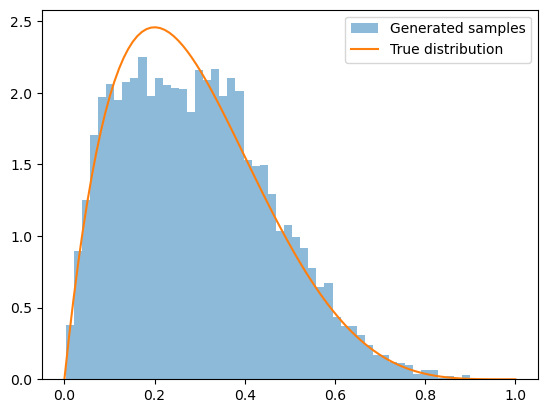

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define the beta distribution parameters
alpha = 2
beta_val = 5

# Define the acceptance probability function for accept-reject sampling
def acceptance_probability(x):
    return beta.pdf(x, alpha, beta_val)

# Generate samples using accept-reject sampling
n = 10000
samples = []
while len(samples) < n:
    x = np.random.uniform(0, 1)
    u = np.random.uniform(0, 1)
    if u <= acceptance_probability(x) / (2 * beta.pdf(0.5, alpha, beta_val)):
        samples.append(x)

# Plot the histogram of generated samples along with the true beta distribution
plt.hist(samples, bins=50, density=True, alpha=0.5, label='Generated samples')
x = np.linspace(0, 1, 100)
plt.plot(x, beta.pdf(x, alpha, beta_val), label='True distribution')
plt.legend()
plt.show()
